# 3つの面の3つの組み合わせそれぞれの角の2等分面の交点を求める確認プログラム

面の方程式は

$$
ax+by+cz+d=0
$$

これの法線ベクトルは $(a,b,c)$ である．

もし面が2つあり，それぞれ法線ベクトルが $(a_0, b_0,c_0), (a_1, b_1,c_1)$ であるとき，その角を2等分する面の法線ベクトルは

## 例

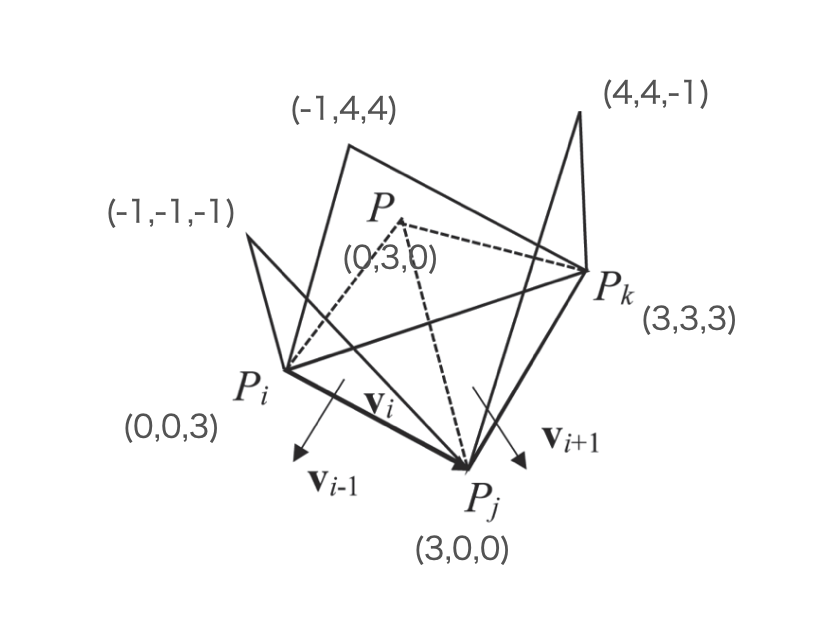

結合情報はループごとに変わったりしないため，実際のテトラメッシュの際には以下の以前計算を推奨

1. 1つのtetraにつき各面を鏡面とした対称の点が4つあるはずなので，tetraのindex順に合わせて，各面の対称点のindexを保持しておく
2. 1つの点につき平均20個のtetraに属していると思われるので，各点についてその点を含むtetraのindexを保持しておく
3. 



In [1]:
import numpy as np

P = np.array([
    [0,3,0],
    [0,0,3],
    [3,0,0], 
    [3,3,3],
    [-1,-1,-1],
    [4,4,-1],
    [-1,4,4],
    ])

In [10]:
normilize = lambda x: x / np.linalg.norm(x)

P12 = P[2] - P[1]
P14 = P[4] - P[1]

v12 = normilize(np.cross(P12, P14))
v12


array([-0.19245009,  0.96225045, -0.19245009])

In [11]:
P23 = P[3] - P[2]
P25 = P[5] - P[2]

v23 = normilize(np.cross(P23, P25))
v23


array([-0.96225045,  0.19245009, -0.19245009])

In [12]:
P31 = P[1] - P[3]
P36 = P[6] - P[3]

v31 = normilize(np.cross(P31, P36))
v31


array([-0.19245009,  0.19245009, -0.96225045])

In [31]:
v0 = -normilize(np.cross(P12, P23))
v0

array([-0.57735027,  0.57735027, -0.57735027])

In [32]:
A = np.array([v12-v0, v23-v0, v31-v0])
A

array([[ 0.38490018,  0.38490018,  0.38490018],
       [-0.38490018, -0.38490018,  0.38490018],
       [ 0.38490018, -0.38490018, -0.38490018]])

In [33]:
b = A * np.array([P[1], P[2], P[3]])
b = b.sum(axis=1)
b

array([ 1.15470054, -1.15470054, -1.15470054])

In [34]:
A @ P[0]

array([ 1.15470054, -1.15470054, -1.15470054])

In [35]:
np.linalg.solve(A, b)

array([ 1.44222201e-16,  3.00000000e+00, -2.16333302e-16])

In [36]:
P[0]

array([0, 3, 0])